In [1]:
from sklearn import datasets

digits = datasets.load_digits()
print('digits.images: ' + str(digits.images.shape))
print('digits.target: ' + str(digits.target.shape))

digits.images: (1797, 8, 8)
digits.target: (1797,)


In [2]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

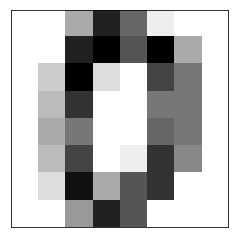

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)

In [4]:
digits.target[0]

0

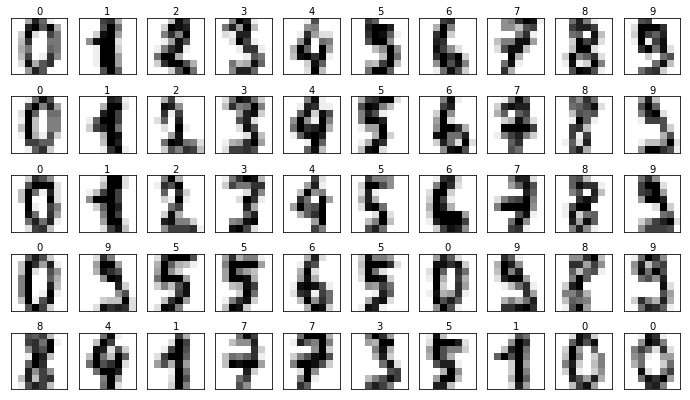

In [5]:
# Plot the first 50 images and show the corresponding labels
fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r)
    ax.text(0.45, 1.05, str(digits.target[i]), transform=ax.transAxes)

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

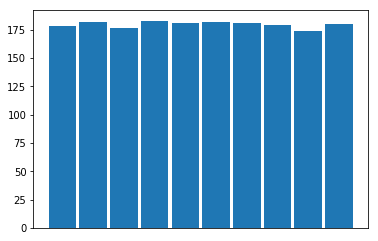

In [6]:
# Plot the distribution of the samples
plt.xticks([])
plt.hist(digits.target, rwidth=0.9)

In [7]:
# Train a logistic-regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1)) # Flatten 2D 8x8 arrays of pixel values into 1D arrays
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, random_state=0)

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
# Show the confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model.predict(x_test))

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  1,  0,  3,  0],
       [ 0,  0, 34,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0, 37,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 35,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  2, 37]])

In [9]:
# Show the accuracy of the model
model.score(x_test, y_test)

0.95

In [10]:
# Show additional accuracy metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

y_pred = model.predict(x_test)

print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))
print('Precision: ' + str(precision_score(y_test, y_pred, average=None).mean()))
print('Recall: ' + str(recall_score(y_test, y_pred, average=None).mean()))
print('F1 score: ' + str(f1_score(y_test, y_pred, average=None).mean()))

Accuracy: 0.95
Precision: 0.9507125468617404
Recall: 0.9531024327975548
F1 score: 0.9514919881261854
